In [1]:
import pandas as pd
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
import LogisticRegressionModules as lrm

Vocab Size:500
Accuracy:0.8871349644830308, Precision:0.9003067484662577, Recall:0.8827067669172932, F1_Score:0.8914198936977981
Time:2s
-------------------------------------------
Vocab Size:1000
Accuracy:0.9052880820836622, Precision:0.9248466257668712, Recall:0.8946587537091988, F1_Score:0.9095022624434388
Time:3s
-------------------------------------------
Vocab Size:1500
Accuracy:0.9100236779794791, Precision:0.9187116564417178, Recall:0.9075757575757576, F1_Score:0.913109756097561
Time:3s
-------------------------------------------
Vocab Size:2000
Accuracy:0.9155485398579322, Precision:0.9263803680981595, Recall:0.9110105580693816, F1_Score:0.9186311787072244
Time:2s
-------------------------------------------
Vocab Size:2500
Accuracy:0.9131807419100236, Precision:0.9233128834355828, Recall:0.9093655589123867, F1_Score:0.9162861491628616
Time:3s
-------------------------------------------
[500, 1000, 1500, 2000, 2500]
[0.8871349644830308, 0.9052880820836622, 0.9100236779794791, 0

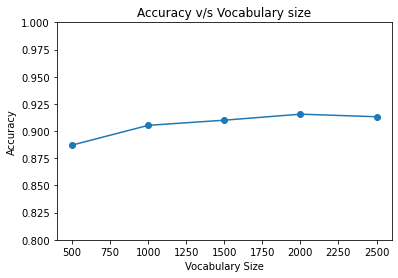

In [3]:
# Vocabulary size test
# Using no preprocessing, no cropping, and tf-idf vectorizer
vocab_size = [500,1000,1500,2000,2500]

dataframe = pd.read_csv('./data/fake_or_real_news.csv')
dataset = (dataframe['title'] + ' ' + dataframe['text']).to_numpy()

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

accuracy_list = []
# specifying the vocab size is equivalent to specifying the max features in the vectorizer
for max_features in vocab_size:
    epoch_time_start = int(time.time())
    print('Vocab Size:' + str(max_features))
    
    X_data = lrm.fit_vectorizer(dataset, vec_type="tfidf", max_features=max_features)
    
    accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
    accuracy_list.append(accuracy)
    
    epoch_time_end = int(time.time())
    print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
    print('-------------------------------------------')
    
print(vocab_size)
print(accuracy_list)

plt.xlabel('Vocabulary Size')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.title('Accuracy v/s Vocabulary size')
plt.plot(vocab_size,accuracy_list, marker='o')
plt.savefig('plots/vocab_size')

Percent to keep:20.0%
Accuracy:0.8816101026045777, Precision:0.8880368098159509, Recall:0.8826219512195121, F1_Score:0.8853211009174311
Time:2s
-------------------------------------------
Percent to keep:40.0%
Accuracy:0.8926598263614838, Precision:0.897239263803681, Recall:0.8944954128440367, F1_Score:0.895865237366003
Time:2s
-------------------------------------------
Percent to keep:60.0%
Accuracy:0.8981846882399369, Precision:0.9079754601226994, Recall:0.8956127080181543, F1_Score:0.9017517136329017
Time:4s
-------------------------------------------
Percent to keep:80.0%
Accuracy:0.9052880820836622, Precision:0.911042944785276, Recall:0.9054878048780488, F1_Score:0.9082568807339448
Time:3s
-------------------------------------------
Percent to keep:100%
Accuracy:0.9100236779794791, Precision:0.9187116564417178, Recall:0.9075757575757576, F1_Score:0.913109756097561
Time:4s
-------------------------------------------
[0.2, 0.4, 0.6, 0.8, 1]
[0.8816101026045777, 0.8926598263614838, 

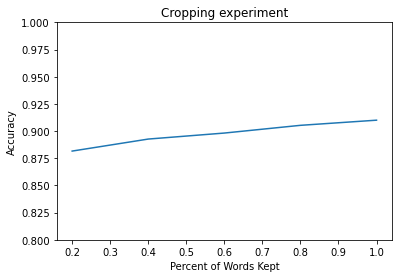

In [4]:
# Cropping test
# Using no preprocessing, and tf-idf vectorizer with vocab_size = 1500
perc_to_keep = [0.20,0.40,0.60,0.80,1]

dataframe = pd.read_csv('./data/fake_or_real_news.csv')
le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

accuracy_list = []
for perc in perc_to_keep:
    epoch_time_start = int(time.time())
    print('Percent to keep:' + str(perc*100) + '%')
    
    dataframe['crop_text'] = dataframe.apply(lambda row: lrm.crop(row['text'],perc), axis=1)
    dataset = (dataframe['title'] + ' ' + dataframe['crop_text']).to_numpy()
    X_data = lrm.fit_vectorizer(dataset, vec_type="tfidf", max_features=1500)
    
    accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
    accuracy_list.append(accuracy)
    epoch_time_end = int(time.time())
    print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
    print('-------------------------------------------')
print(perc_to_keep)
print(accuracy_list)

plt.xlabel('Percent of Words Kept')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.title('Cropping experiment')
plt.plot(perc_to_keep,accuracy_list)
plt.savefig('plots/cropping')

Vectorizer:binary
Accuracy:0.9116022099447514, Precision:0.9125766871165644, Recall:0.9153846153846154, F1_Score:0.9139784946236559
Time:2s
-------------------------------------------
Vectorizer:counts
Accuracy:0.8910812943962115, Precision:0.9079754601226994, Recall:0.8835820895522388, F1_Score:0.8956127080181544
Time:3s
-------------------------------------------
Vectorizer:tfidf
Accuracy:0.9155485398579322, Precision:0.9263803680981595, Recall:0.9110105580693816, F1_Score:0.9186311787072244
Time:3s
-------------------------------------------
['binary', 'counts', 'tfidf']
[0.9116022099447514, 0.8910812943962115, 0.9155485398579322]


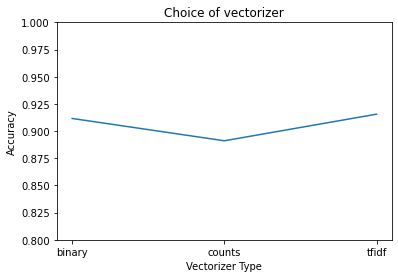

In [5]:
# Best vectorization technique
# Using no preprocessing, no cropping, and vocab_size = 2000
vectorizer_type = ['binary','counts','tfidf']

dataframe = pd.read_csv('./data/fake_or_real_news.csv')
dataset = (dataframe['title'] + ' ' + dataframe['text']).to_numpy()

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

accuracy_list = []
for vectorizer in vectorizer_type:
    epoch_time_start = int(time.time())
    print('Vectorizer:' + vectorizer)
    
    X_data = lrm.fit_vectorizer(dataset, vec_type=vectorizer, max_features=2000)
    
    accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
    accuracy_list.append(accuracy)
    epoch_time_end = int(time.time())
    print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
    print('-------------------------------------------')
print(vectorizer_type)
print(accuracy_list)

plt.xlabel('Vectorizer Type')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.plot(vectorizer_type,accuracy_list)
plt.title('Choice of vectorizer')
plt.savefig('plots/vectorization')

Preprocessing:Yes
Preprocessing dataset
Completed Preprocessing dataset
Accuracy:0.9116022099447514, Precision:0.9171779141104295, Recall:0.9115853658536586, F1_Score:0.9143730886850153
Time:78s
-------------------------------------------
Preprocessing:No
Accuracy:0.9100236779794791, Precision:0.9187116564417178, Recall:0.9075757575757576, F1_Score:0.913109756097561
Time:3s
-------------------------------------------
['Yes', 'No']
[0.9116022099447514, 0.9100236779794791]


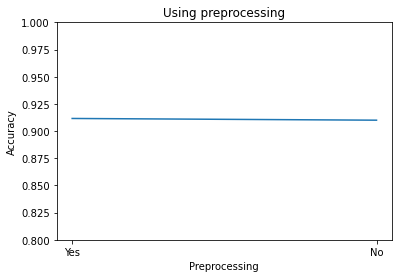

In [6]:
# Pre-processing vs. no Pre-processing
# Using no cropping, and tfidf with vocab_size = 1500

dataframe = pd.read_csv('./data/fake_or_real_news.csv')
dataset = (dataframe['title'] + ' ' + dataframe['text']).to_numpy()

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

accuracy_list = []
epoch_time_start = int(time.time())
print('Preprocessing:Yes')
print('Preprocessing dataset')
preprocessed_dataset = lrm.pre_processing(dataset)
print('Completed Preprocessing dataset')
X_data = lrm.fit_vectorizer(preprocessed_dataset, vec_type='tfidf', max_features=1500)

accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
accuracy_list.append(accuracy)
epoch_time_end = int(time.time())
print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
print('-------------------------------------------')
epoch_time_start = int(time.time())
print('Preprocessing:No')

X_data = lrm.fit_vectorizer(dataset, vec_type='tfidf', max_features=1500)

accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
accuracy_list.append(accuracy)
epoch_time_end = int(time.time())
print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
print('-------------------------------------------')
preprocessing_list = ['Yes','No']
print(preprocessing_list)
print(accuracy_list)

plt.xlabel('Preprocessing')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.title('Using preprocessing')
plt.plot(preprocessing_list,accuracy_list)
plt.savefig('plots/preprocessing')

In [7]:
# Vocab_size = 2000
# Cropping = None
# Vectorization = tfidf
# Preprocessing = No

#dataframe = pd.read_csv('./data/fake_or_real_news.csv')
#dataset = (dataframe['title'] + ' ' + dataframe['text']).to_numpy()
X_data = lrm.fit_vectorizer(preprocessed_dataset, vec_type='tfidf', max_features=2000)

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

clf = LogisticRegression(max_iter=10000, random_state=10)

C = [0.01, 0.1, 1, 10, 100]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

grid = dict(C=C, solver=solver)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, scoring='accuracy', error_score=0, verbose=3)

grid_result = grid_search.fit(X_data, y_binary)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best: 0.928177 using {'C': 10, 'solver': 'saga'}
0.840253 (0.007678) with: {'C': 0.01, 'solver': 'newton-cg'}
0.840253 (0.007678) with: {'C': 0.01, 'solver': 'lbfgs'}
0.848303 (0.006282) with: {'C': 0.01, 'solver': 'liblinear'}
0.840410 (0.007461) with: {'C': 0.01, 'solver': 'sag'}
0.840253 (0.007678) with: {'C': 0.01, 'solver': 'saga'}
0.886977 (0.003250) with: {'C': 0.1, 'solver': 'newton-cg'}
0.886977 (0.003250) with: {'C': 0.1, 'solver': 'lbfgs'}
0.887924 (0.003077) with: {'C': 0.1, 'solver': 'liblinear'}
0.886819 (0.003220) with: {'C': 0.1, 'solver': 'sag'}
0.886977 (0.003250) with: {'C': 0.1, 'solver': 'saga'}
0.920916 (0.004901) with: {'C': 1, 'solver': 'newton-cg'}
0.920916 (0.004901) with: {'C': 1, 'solver': 'lbfgs'}
0.920758 (0.004645) with: {'C': 1, 'solver': 'liblinear'}
0.920916 (0.004901) with: {'C': 1, 'solver': 'sag'}
0.920916 (0.004901) with: {'C': 1, 'solver': 'saga'}
0.928019 (0.006458) with: {'C': 10, 'so

In [8]:
# Vocab_size = 2000
# Cropping = None
# Vectorization = tfidf
# Preprocessing = Yes

X_data,vocab = lrm.fit_vectorizer_v2(preprocessed_dataset, vec_type='tfidf', max_features=2000)

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_binary, test_size = 0.2, random_state = 0)
    
clf = LogisticRegression(max_iter=10000, C=10, solver='saga', random_state = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]

Accuracy = (TP + TN) / (TP + TN + FP + FN) 
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_Score = 2 * Precision * Recall / (Precision + Recall)

print('Accuracy:' + str(Accuracy) + ', Precision:' + str(Precision) 
      + ', Recall:' + str(Recall)+ ', F1_Score:' + str(F1_Score))

Accuracy:0.920284135753749, Precision:0.9340490797546013, Recall:0.9130434782608695, F1_Score:0.9234268385140257


In [9]:
# Interpreting_Results
# Fake = 0 (negative results)
# Real = 1 (positive results)
keys = vocab.keys()
values = vocab.values()

df = pd.DataFrame(
    {'keys': keys
    })

df['coef'] = clf.coef_[0]

df.to_csv('interpret_test_v2.csv',index=False)

In [10]:
df_negative = df.sort_values(by='coef',ascending=True).head(30).copy()
df_negative['coef'] = (df_negative['coef']*-100).astype(int)
print(df_negative)
df_negative.to_csv('Interpret_Negative_Result.csv',index=False)

              keys  coef
26           retir  1032
1244      therefor   939
288          expos   785
1670       confirm   729
171         bureau   723
1229     experienc   668
1622      platform   622
864          total   594
1893        carter   567
81         struggl   552
643           iran   547
1877         cuban   537
1858        regard   531
1243          sell   522
884         experi   502
451         famili   500
1175         insid   485
1384        overal   479
520          blame   466
1345          onli   452
580   pennsylvania   445
1789         syria   444
1246        design   439
609          rival   432
1342        promot   427
1227         about   423
1956        climat   413
32           parti   407
392       colleagu   401
34         exactli   394


In [11]:
master_negative_list = []
for index,row in df_negative.iterrows():
    temp_list = [row['keys']]*row['coef']
    master_negative_list.extend(temp_list)
#print(master_negative_list)
master_negative_str = ' '.join(master_negative_list)
print(master_negative_str)

retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir retir reti

In [12]:
df_positive = df.sort_values(by='coef',ascending=False).head(30).copy()
df_positive['coef'] = (df_positive['coef']*100).astype(int)
print(df_positive)
df_positive.to_csv('Interpret_Positive_Result.csv',index=False)

           keys  coef
286       meant  1036
1560        era   867
1570      trail   781
423        john   634
422   secretari   605
768          on   587
1476       fell   499
761       photo   496
300       alleg   496
806       adopt   468
1452        cut   462
1217       list   458
1759         ga   457
477        eric   456
443        meet   427
1347      dozen   427
1165      click   420
324      commit   405
1888       user   402
1780       leak   396
1103       five   380
1566       kept   379
296      follow   376
1097       past   374
120      inform   374
1182     perhap   367
1847     chines   364
1604      mount   363
1564     financ   362
121       store   359


In [13]:
master_positive_list = []
for index,row in df_positive.iterrows():
    temp_list = [row['keys']]*row['coef']
    master_positive_list.extend(temp_list)
#print(master_positive_list)
master_positive_str = ' '.join(master_positive_list)
print(master_positive_str)

meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant meant mean

[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.830 total time=   0.6s
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.837 total time=   0.4s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.855 total time=   0.5s
[CV 3/5] END ................C=0.01, solver=sag;, score=0.844 total time=   2.4s
[CV 2/5] END ...........C=0.1, solver=newton-cg;, score=0.885 total time=   3.4s
[CV 4/5] END ...............C=0.1, solver=lbfgs;, score=0.883 total time=   0.7s
[CV 5/5] END ...........C=0.1, solver=liblinear;, score=0.891 total time=   0.4s
[CV 3/5] END ................C=0.1, solver=saga;, score=0.888 total time=   1.9s
[CV 4/5] END .............C=1, solver=newton-cg;, score=0.915 total time=   1.9s
[CV 5/5] END .................C=1, solver=lbfgs;, score=0.919 total time=   1.2s
[CV 3/5] END ..................C=1, solver=saga;, score=0.923 total time=   1.9s
[CV 1/5] END ............C=10, solver=newton-cg;, score=0.931 total time=   2.5s
[CV 4/5] END ...............

[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.830 total time=   1.8s
[CV 5/5] END ................C=0.01, solver=sag;, score=0.836 total time=   2.3s
[CV 3/5] END ...........C=0.1, solver=newton-cg;, score=0.888 total time=   3.9s
[CV 2/5] END ...........C=0.1, solver=liblinear;, score=0.886 total time=   0.4s
[CV 5/5] END .................C=0.1, solver=sag;, score=0.893 total time=   2.2s
[CV 5/5] END .............C=1, solver=newton-cg;, score=0.919 total time=   2.5s
[CV 2/5] END ...................C=1, solver=sag;, score=0.918 total time=   2.6s
[CV 2/5] END ............C=10, solver=newton-cg;, score=0.921 total time=   2.5s
[CV 5/5] END ................C=10, solver=lbfgs;, score=0.933 total time=   1.9s
[CV 4/5] END ..................C=10, solver=sag;, score=0.919 total time=   4.1s
[CV 1/5] END ...........C=100, solver=newton-cg;, score=0.913 total time=   2.5s
[CV 2/5] END ...............C=100, solver=lbfgs;, score=0.913 total time=   4.1s
[CV 4/5] END ...............